In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from model_helper import *

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

main = pd.read_pickle("scaled_main.df")

splitDate = pd.to_datetime("1998-07-19")
main = main.loc[main.date >= splitDate]
main.reset_index()
len(main.loc[main["lengths_behind"]>=70])

42

In [2]:
FEATURES = [#"gear_change", 
            "horse_rating_rel", "last_speed_rating_rel", "average_speed_rating_rel",
            "best_surface_distance_rel", "weight_rating_rel", "rest_rating_rel", "going_rating_rel",
            "jockey_win_percent_rel", "trainer_win_percent_rel", "horse_win_percent_rel",
            "horse_norm_record_rel", "trainer_norm_record_rel", "jockey_norm_record_rel", 
            "trainer_jockey_record_rel", "draw_win_percent_rel",
            "avg_sec1_speed_rating_rel", "last_sec1_speed_rating_rel",
            "avg_last_sec_speed_rating_rel", "last_last_sec_speed_rating_rel",
            "avg_speed_rating_ratio_rel", "last_speed_rating_ratio_rel"
           ]
mm_FEATURES = [feat[:-4]+"_mm" for feat in FEATURES]
rb_FEATURES = [feat[:-4]+"_rb" for feat in FEATURES]

TARGET = "won"

0.24133333333333334
Win Percent: 0.030973451327433628
0.228
Win Percent: 0.03870967741935484
0.21333333333333335
Win Percent: 0.028985507246376812
0.22830440587449932
Win Percent: 0.014084507042253521
0.22696929238985314
Win Percent: 0.021505376344086023
0.2136181575433912
Win Percent: 0.027777777777777776
0.20160213618157544
Win Percent: 0.06206896551724138

Average Win Percent: 0.22188009409371223


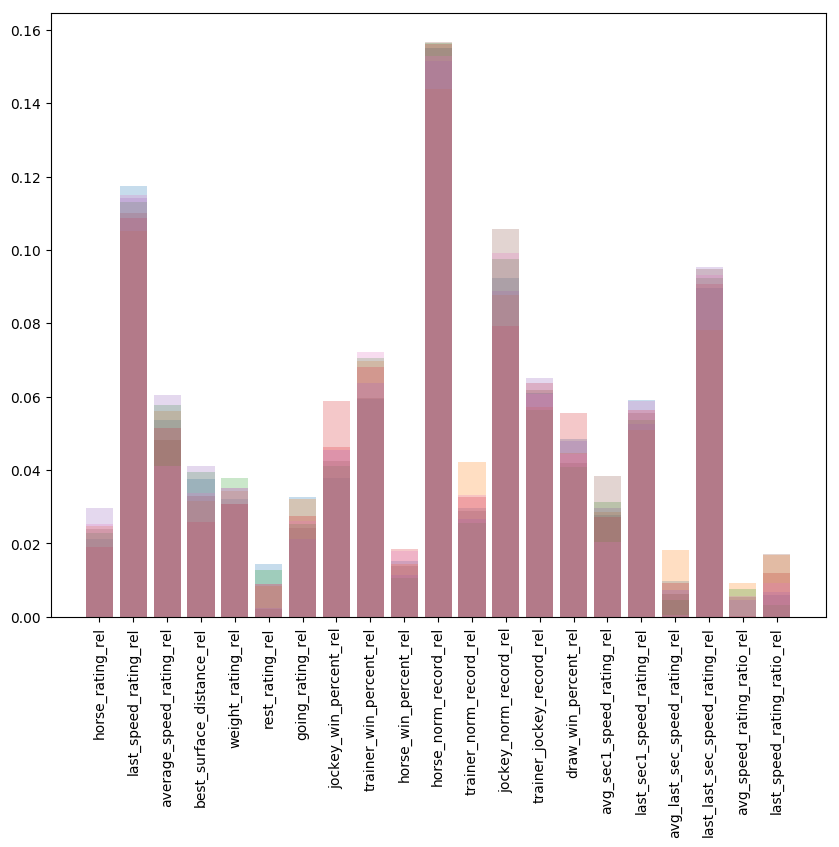

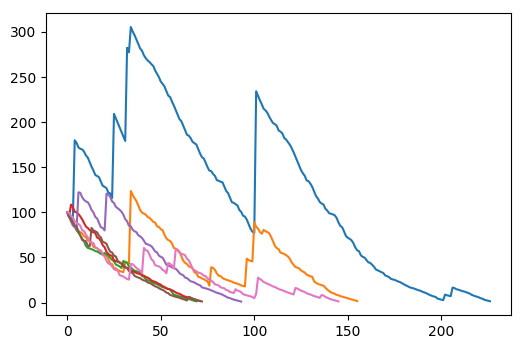

In [3]:
# normal scaled features
plt.figure(figsize=(10,8), dpi=100) 
ms = []
avg = 0
cross_val_folds = 7
for training, testing in getCrossVal(main, cross_val_folds):

    model = LogisticRegression(max_iter=2000)
    X_train = training[FEATURES]
    y_train = training[TARGET]
    X_test = testing[FEATURES]
    y_test = testing[TARGET]
    
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)
    
    
    LR_importance = abs(model.coef_)[0]
    normal_LR = [val / float(sum(LR_importance)) for val in LR_importance]
    plt.bar(range(len(FEATURES)), normal_LR, label="Logistic Regression", alpha=0.25)
    plt.xticks(range(len(FEATURES)), FEATURES, rotation=90)
    preds_sep = [i for _, i in model.predict_proba(X_test)]
    
    race_sizes = [testing.loc[testing["race_id"]==r].shape[0] for r in np.unique(testing["race_id"])]
    
    count = 0
    won = 0 
    for race_size in race_sizes:
        lowI = count
        highI = count + race_size
        
        p = preds_sep[lowI:highI]
        act = testing.iloc[lowI:highI, :]
        prediction = np.argmax(p)
        result = np.argmax(act["won"])
        
        if prediction == result:
            won += 1
        count += race_size
            
    winPct = won/float(len(race_sizes))
    print(winPct)
    avg += winPct
    
    m = betSim_1(preds, testing, minBetSize=0.5, maxBetSize=5, startMoney=100)
    ms.append(m)
print("\nAverage Win Percent:", avg / cross_val_folds)

plt.figure(figsize=(6,4), dpi=100)
for m in ms:
    plt.plot(m)

0.204
Win Percent: 0.052980132450331126
0.24533333333333332
Win Percent: 0.04285714285714286
0.20666666666666667
Win Percent: 0.013157894736842105
0.22162883845126835
Win Percent: 0.025
0.23230974632843793
Win Percent: 0.03389830508474576
0.19626168224299065
Win Percent: 0.031746031746031744
0.2096128170894526
Win Percent: 0.014285714285714285
Average Win Percent: 0.21654472630173563


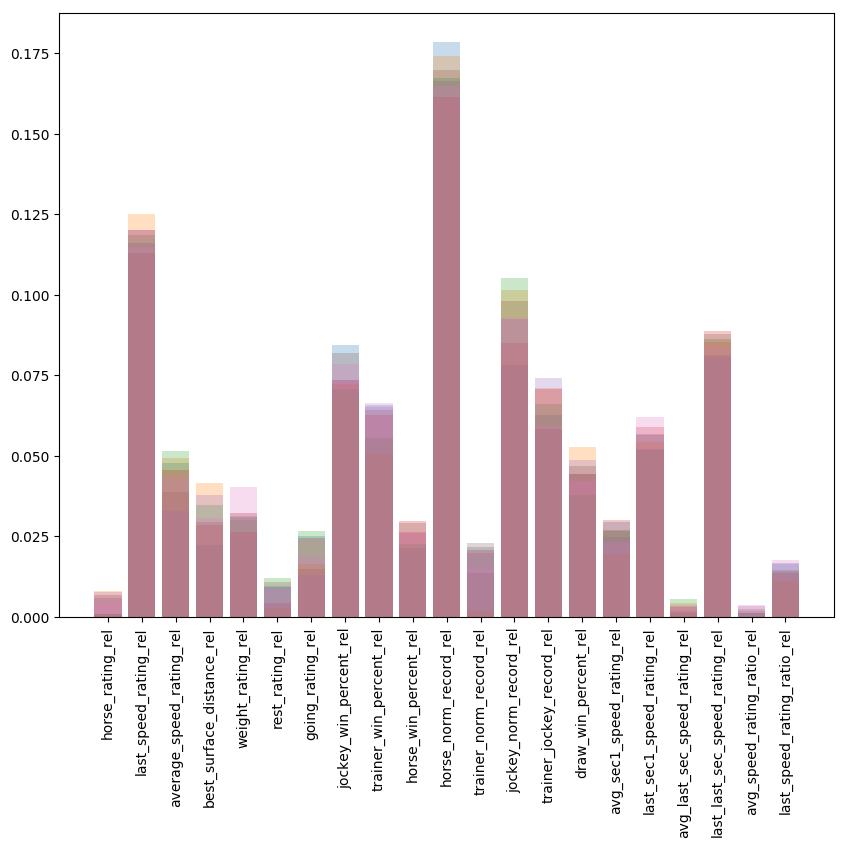

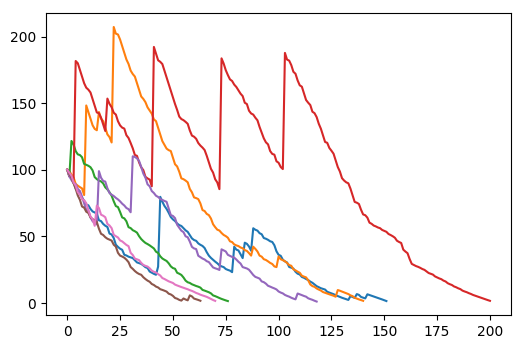

In [4]:
# max min scaled features
plt.figure(figsize=(10,8), dpi=100) 
ms = []
avg = 0
cross_val_folds = 7
for training, testing in getCrossVal(main, cross_val_folds):

    model = LogisticRegression(max_iter=2000)
    X_train = training[mm_FEATURES]
    y_train = training[TARGET]
    X_test = testing[mm_FEATURES]
    y_test = testing[TARGET]
    
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)
    
    
    LR_importance = abs(model.coef_)[0]
    normal_LR = [val / float(sum(LR_importance)) for val in LR_importance]
    plt.bar(range(len(FEATURES)), normal_LR, label="Logistic Regression", alpha=0.25)
    plt.xticks(range(len(FEATURES)), FEATURES, rotation=90)
    preds_sep = [i for _, i in model.predict_proba(X_test)]
    
    race_sizes = [testing.loc[testing["race_id"]==r].shape[0] for r in np.unique(testing["race_id"])]
    
    count = 0
    won = 0 
    for race_size in race_sizes:
        lowI = count
        highI = count + race_size
        
        p = preds_sep[lowI:highI]
        act = testing.iloc[lowI:highI, :]
        prediction = np.argmax(p)
        result = np.argmax(act["won"])
        
        if prediction == result:
            won += 1
        count += race_size
            
    winPct = won/float(len(race_sizes))
    print(winPct)
    avg += winPct
    
    m = betSim_1(preds, testing, minBetSize=0.5, maxBetSize=5, startMoney=100)
    ms.append(m)
print("Average Win Percent:", avg / cross_val_folds)

plt.figure(figsize=(6,4), dpi=100)
for m in ms:
    plt.plot(m)

0.22266666666666668
Win Percent: 0.023255813953488372
0.18
Win Percent: 0.014492753623188406
0.24533333333333332
Win Percent: 0.03216374269005848
0.20160213618157544
Win Percent: 0.027210884353741496
0.20694259012016022
Win Percent: 0.027522935779816515
0.22162883845126835
Win Percent: 0.0
0.24432576769025366
Win Percent: 0.01282051282051282
Average Win Percent: 0.21749990463475108


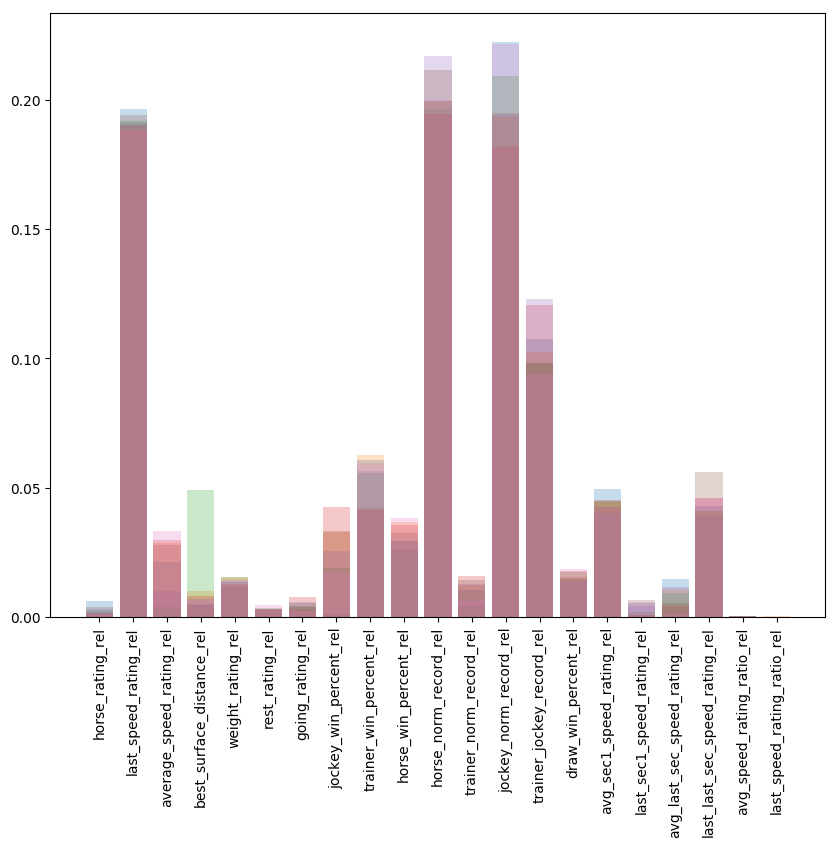

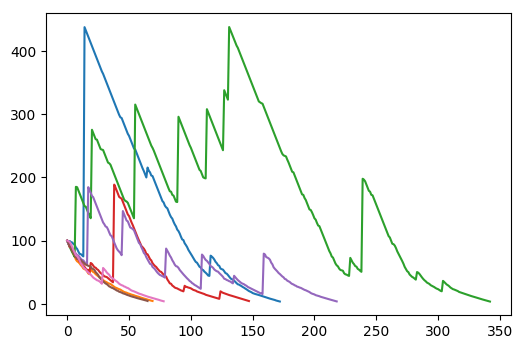

In [5]:
# robust scaled features
plt.figure(figsize=(10,8), dpi=100) 
ms = []
avg = 0
cross_val_folds = 7
for training, testing in getCrossVal(main, cross_val_folds):

    model = LogisticRegression(max_iter=2000)
    X_train = training[rb_FEATURES]
    y_train = training[TARGET]
    X_test = testing[mm_FEATURES]
    y_test = testing[TARGET]
    
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)
    
    
    LR_importance = abs(model.coef_)[0]
    normal_LR = [val / float(sum(LR_importance)) for val in LR_importance]
    plt.bar(range(len(FEATURES)), normal_LR, label="Logistic Regression", alpha=0.25)
    plt.xticks(range(len(FEATURES)), FEATURES, rotation=90)
    preds_sep = [i for _, i in model.predict_proba(X_test)]
    
    race_sizes = [testing.loc[testing["race_id"]==r].shape[0] for r in np.unique(testing["race_id"])]
    
    count = 0
    won = 0 
    for race_size in race_sizes:
        lowI = count
        highI = count + race_size
        
        p = preds_sep[lowI:highI]
        act = testing.iloc[lowI:highI, :]
        prediction = np.argmax(p)
        result = np.argmax(act["won"])
        
        if prediction == result:
            won += 1
        count += race_size
            
    winPct = won/float(len(race_sizes))
    print(winPct)
    avg += winPct
    
    m = betSim_1(preds, testing, minBetSize=0.5, maxBetSize=5, startMoney=100)
    ms.append(m)
print("Average Win Percent:", avg / cross_val_folds)

plt.figure(figsize=(6,4), dpi=100)
for m in ms:
    plt.plot(m)